<h1>Introduction</h1>

<p>The messages within the datasets have already been classified as spam, or ham (not spam). </p> 

<p>The implementation of a Naïve Bayes Spam Filter is relatively straight forward using scikit-learn.</p> 
<p>Bayes Theorem can give us the probability that a message is spam S for a given event E</p>

<h3>1.  Read the dataset into a dataframe and explore</h3>


In [2]:
# imports
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
print(df.head(20))

      v1                                                 v2 Unnamed: 2  \
0    ham  Go until jurong point, crazy.. Available only ...        NaN   
1    ham                      Ok lar... Joking wif u oni...        NaN   
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3    ham  U dun say so early hor... U c already then say...        NaN   
4    ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5   spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6    ham  Even my brother is not like to speak with me. ...        NaN   
7    ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8   spam  WINNER!! As a valued network customer you have...        NaN   
9   spam  Had your mobile 11 months or more? U R entitle...        NaN   
10   ham  I'm gonna be home soon and i don't want to tal...        NaN   
11  spam  SIX chances to win CASH! From 100 to 20,000 po...        NaN   
12  spam  URGENT! You have won a 1 wee

<h3>2. Clean the data</h3>


In [5]:
# df = df.drop(df.columns[-1], axis=1)
df = df.iloc[:, :-3]
print(df)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [6]:
df['v2'] = df['v2'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
df['v2'] = df['v2'].str.lower()
# print(df)
# clean = pd.DataFrame(df['v2'])
# print(clean)



clean = df.copy()
print(clean)

        v1                                                 v2
0      ham  go until jurong point crazy available only in ...
1      ham                            ok lar joking wif u oni
2     spam  free entry in  a wkly comp to win fa cup final...
3      ham        u dun say so early hor u c already then say
4      ham  nah i dont think he goes to usf he lives aroun...
...    ...                                                ...
5567  spam  this is the nd time we have tried  contact u u...
5568   ham                 will  b going to esplanade fr home
5569   ham  pity  was in mood for that soany other suggest...
5570   ham  the guy did some bitching but i acted like id ...
5571   ham                          rofl its true to its name

[5572 rows x 2 columns]


<h3>3. Split the Data</h3>

In [7]:
# Calculate the sizes for each split
total_size = len(clean)
train_size = int(total_size * 0.65)
validation_size = int(total_size * 0.15)
test_size = total_size - train_size - validation_size

# Split the data
train_data = clean[:train_size]
validation_data = clean[train_size:train_size + validation_size]
test_data = clean[train_size + validation_size:]

# Print the sizes of each dataset to verify
print("Training Data Size:", train_data.shape)
print("Validation Data Size:", validation_data.shape)
print("Testing Data Size:", test_data.shape)

Training Data Size: (3621, 2)
Validation Data Size: (835, 2)
Testing Data Size: (1116, 2)


In [8]:
train_data.rename(columns={'v1': 'Category', 'v2': 'Message'}, inplace=True)
validation_data.rename(columns={'v1': 'Category', 'v2': 'Message'}, inplace=True)
test_data.rename(columns={'v1': 'Category', 'v2': 'Message'}, inplace=True)
# print
print(train_data.head())
print(validation_data.head())
print(test_data.head())


  Category                                            Message
0      ham  go until jurong point crazy available only in ...
1      ham                            ok lar joking wif u oni
2     spam  free entry in  a wkly comp to win fa cup final...
3      ham        u dun say so early hor u c already then say
4      ham  nah i dont think he goes to usf he lives aroun...
     Category                                            Message
3621      ham               goin to workout lor muz lose e fats 
3622      ham                damn poor zac doesnt stand a chance
3623      ham                  no messageno responcewhat happend
3624      ham  i want to tel u one thing u should not mistake...
3625      ham           yeah right ill bring my tape measure fri
     Category                                            Message
4456      ham  aight should i just plan to come up later tonight
4457      ham  die i accidentally deleted e msg i suppose  pu...
4458     spam  welcome to ukmobiledate this

/var/folders/rr/3svjccls2bs8cm2k1gyht8p00000gn/T/ipykernel_87436/303922966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.rename(columns={'v1': 'Category', 'v2': 'Message'}, inplace=True)
/var/folders/rr/3svjccls2bs8cm2k1gyht8p00000gn/T/ipykernel_87436/303922966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data.rename(columns={'v1': 'Category', 'v2': 'Message'}, inplace=True)
/var/folders/rr/3svjccls2bs8cm2k1gyht8p00000gn/T/ipykernel_87436/303922966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

<h3>4. Create a Word Frequency DataFrame</h3>


In [9]:
word_freq = {}

for index, row in train_data.iterrows():
    words = row['Message'].split()
    for word in words:
        if word in word_freq:
            if row['Category'] == 'spam':
                word_freq[word]['#Spam'] += 1
            else:
                word_freq[word]['#Ham'] += 1
        else:
            if row['Category'] == 'spam':
                word_freq[word] = {'#Spam': 1, '#Ham': 0}
            else:
                word_freq[word] = {'#Spam': 0, '#Ham': 1}

word_freq = pd.DataFrame.from_dict(word_freq, orient='index')

word_freq = word_freq.fillna(0)

word_freq.reset_index(inplace=True)
word_freq.rename(columns={'index': 'Word'}, inplace=True)

print(word_freq)


          Word  #Spam  #Ham
0           go     20   159
1        until      5    17
2       jurong      0     1
3        point      0    11
4        crazy      2     7
...        ...    ...   ...
6758   apology      0     1
6759    hustle      0     1
6760     forth      0     1
6761  audition      0     1
6762    harlem      0     1

[6763 rows x 3 columns]


<h3>5. Visualise the Data</h3>
<p>use a Word Cloud library to visualise the most common words contained in spam messages.</p>



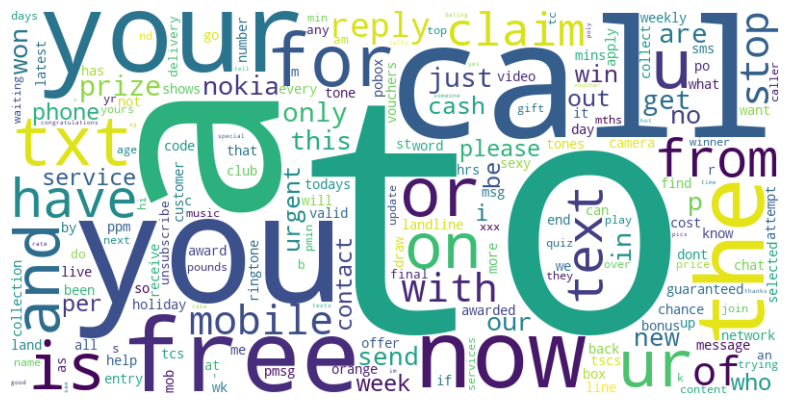

In [10]:
spam_word_freq = word_freq[word_freq['#Spam'] > 0]


spam_word_freq_dict = spam_word_freq.set_index('Word').to_dict()['#Spam']

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(spam_word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h3>6.  Calculate</h3>


In [11]:
total_spam_messages = train_data[train_data['Category'] == 'spam'].shape[0]
total_ham_messages = train_data[train_data['Category'] == 'ham'].shape[0]

# pseudocount k
k = 0.5

word_prob = {}

for index, row in word_freq.iterrows():
    # Calculate the probability of the word being found in spam and ham messages
    p_word_given_spam = (row['#Spam'] + k) / (total_spam_messages + 2 * k)
    p_word_given_ham = (row['#Ham'] + k) / (total_ham_messages + 2 * k)
    
    word_prob[row['Word']] = {'P(E|S)': p_word_given_spam, 'P(E|¬S)': p_word_given_ham}

# Convert the dictionary to a DataFrame
word_prob_df = pd.DataFrame.from_dict(word_prob, orient='index')

word_prob_df.reset_index(inplace=True)
word_prob_df.rename(columns={'index': 'Word'}, inplace=True)

print(word_prob_df)


          Word    P(E|S)   P(E|¬S)
0           go  0.042181  0.050845
1        until  0.011317  0.005579
2       jurong  0.001029  0.000478
3        point  0.001029  0.003666
4        crazy  0.005144  0.002391
...        ...       ...       ...
6758   apology  0.001029  0.000478
6759    hustle  0.001029  0.000478
6760     forth  0.001029  0.000478
6761  audition  0.001029  0.000478
6762    harlem  0.001029  0.000478

[6763 rows x 3 columns]


<h3>7. Checking the 'spamliness' of a single word</h3>
<p>Now that we have trained the model, we will test the model.</p>

In [12]:
P_S = 0.4  # Prior - spam
P_not_S = 0.6  # Prior - ham

# free
word = 'free'
P_E_given_S = word_prob_df.loc[word_prob_df['Word'] == word, 'P(E|S)'].values[0]
P_E_given_not_S = word_prob_df.loc[word_prob_df['Word'] == word, 'P(E|¬S)'].values[0]

# P(E)
P_E = (P_E_given_S * P_S) + (P_E_given_not_S * P_not_S)

# P(S|E)
P_S_given_E = (P_E_given_S * P_S) / P_E
# P(¬S|E)
P_not_S_given_E = (P_E_given_not_S * P_not_S) / P_E


print(f"Word = ['{word}']")
print(f"P(E|S) = [{P_E_given_S}]")
print(f"P(E|¬S) = [{P_E_given_not_S}]")
print(f"P(S|E) = [{P_S_given_E}]")
print(f"P(¬S|E) = [{P_not_S_given_E}]")

Word = ['free']
P(E|S) = [0.2993827160493827]
P(E|¬S) = [0.010678992668154287]
P(S|E) = [0.9492123405184515]
P(¬S|E) = [0.05078765948154849]


<h3>8. Checking the 'spamliness' of several words</h3>



In [13]:
# print(train_data.head(20))
print(train_data.at[3000, 'Message'])

this message is free welcome to the new  improved sex  dogging club to unsubscribe from this service reply stop msgsp only


In [19]:
# several words in a message ::

# message = 'imagine life without me see how fast u are searching medont worry lm always there to disturb u goodnoon'
message = 'this message is free welcome to the new  improved sex  dogging club to unsubscribe from this service reply stop msgsp only'
# message = 'free unlimited hardcore porn direct  your mobile txt porn to   get free access for  hrs then chrgdp per day txt stop exit this msg is free'

prob_spam = []
prob_not_spam = []


for word in message.split():
    if word in word_prob_df['Word'].values:
        # spam or ham
        P_E_given_S = word_prob_df.loc[word_prob_df['Word'] == word, 'P(E|S)'].values[0]
        P_E_given_not_S = word_prob_df.loc[word_prob_df['Word'] == word, 'P(E|¬S)'].values[0]
        # appending
        prob_spam.append(P_E_given_S)
        prob_not_spam.append(P_E_given_not_S)

# multiply
result_spam = P_S * np.prod(prob_spam)
result_not_spam = P_not_S * np.prod(prob_not_spam)

# if else
if result_spam > result_not_spam:
    print("The message is classified as spam.")
else:
    print("The message is classified as not spam.")

The message is classified as spam.


<h3>9. Avoiding floating point underflow</h3>


In [15]:
# message = 'imagine life without me see how fast u are searching medont worry lm always there to disturb u goodnoon'
# message = 'free unlimited hardcore porn direct  your mobile txt porn to   get free access for  hrs then chrgdp per day txt stop exit this msg is free'
message = 'wait thats still not all that clear were you not sure about me being sarcastic or that thats why x doesnt want to live with us'


log_prob_spam = np.log(P_S)
log_prob_not_spam = np.log(P_not_S)

for word in message.split():

    if word in word_prob_df['Word'].values:
        log_P_E_given_S = np.log(word_prob_df.loc[word_prob_df['Word'] == word, 'P(E|S)'].values[0])
        log_P_E_given_not_S = np.log(word_prob_df.loc[word_prob_df['Word'] == word, 'P(E|¬S)'].values[0])
        # add logs
        log_prob_spam += log_P_E_given_S
        log_prob_not_spam += log_P_E_given_not_S

if log_prob_spam > log_prob_not_spam:
    print("The message is classified as spam.")
else:
    print("The message is classified as not spam.")

The message is classified as not spam.


<h3>10. Testing the Model</h3>
<p>Now that we have tested the model using simple messages.  Let’s test the model using the messages from the test_set.</p>


In [16]:
match_spam = 0
match_ham = 0
thought_ham_is_spam = 0
thought_spam_is_ham = 0


for index, row in test_data.iterrows():
    # message and label from test_data
    message = row['Message']
    real_label = row['Category']
    
    
    log_prob_spam = np.log(P_S)
    log_prob_not_spam = np.log(P_not_S)
    
    # step 9 model logic
    for word in message.split():
        
        if word in word_prob_df['Word'].values:
            
            log_P_E_given_S = np.log(word_prob_df.loc[word_prob_df['Word'] == word, 'P(E|S)'].values[0])
            log_P_E_given_not_S = np.log(word_prob_df.loc[word_prob_df['Word'] == word, 'P(E|¬S)'].values[0])
            
            log_prob_spam += log_P_E_given_S
            log_prob_not_spam += log_P_E_given_not_S
            

    if log_prob_spam > log_prob_not_spam:
        model_label = 'spam'
    else:
        model_label = 'ham'
    
    # Update counters and accuracy
    if model_label == real_label:
        if model_label == 'spam':
            match_spam += 1
        else:
            match_ham += 1
    else:
        if model_label == 'spam':
            thought_spam_is_ham += 1
        else:
            thought_ham_is_spam += 1

# accuracy
accuracy = (match_spam + match_ham) / len(test_data)


print("match_spam:", match_spam)
print("match_ham:", match_ham)
print("thought_ham_is_spam:", thought_ham_is_spam)
print("thought_spam_is_ham:", thought_spam_is_ham)
print("Accuracy:", accuracy)

match_spam: 145
match_ham: 813
thought_ham_is_spam: 0
thought_spam_is_ham: 158
Accuracy: 0.8584229390681004


<h3>11. Improvements</h3>

<h3></h3>

In [17]:
print(validation_data.head())
print(test_data.head())
print(word_prob_df.head())
print(P_S)

     Category                                            Message
3621      ham               goin to workout lor muz lose e fats 
3622      ham                damn poor zac doesnt stand a chance
3623      ham                  no messageno responcewhat happend
3624      ham  i want to tel u one thing u should not mistake...
3625      ham           yeah right ill bring my tape measure fri
     Category                                            Message
4456      ham  aight should i just plan to come up later tonight
4457      ham  die i accidentally deleted e msg i suppose  pu...
4458     spam  welcome to ukmobiledate this msg is free givin...
4459      ham  this is wishing you a great day moji told me a...
4460      ham  thanks again for your reply today when is ur v...
     Word    P(E|S)   P(E|¬S)
0      go  0.042181  0.050845
1   until  0.011317  0.005579
2  jurong  0.001029  0.000478
3   point  0.001029  0.003666
4   crazy  0.005144  0.002391
0.4


In [20]:
# do sampling 100 times validation set # bootstraping
# store it numpy array or a list
# get the mean at the end of the accuracy 
# df.sample(replace=true)
#

def model_logic(test_data, word_prob_df, P_S, P_not_S):
    match_spam = 0
    match_ham = 0
    thought_ham_is_spam = 0
    thought_spam_is_ham = 0

    for index, row in test_data.iterrows():
        message = row['Message']
        real_label = row['Category']

        log_prob_spam = np.log(P_S)
        log_prob_not_spam = np.log(P_not_S)

        for word in message.split():
            if word in word_prob_df['Word'].values:
                log_P_E_given_S = np.log(word_prob_df.loc[word_prob_df['Word'] == word, 'P(E|S)'].values[0])
                log_P_E_given_not_S = np.log(word_prob_df.loc[word_prob_df['Word'] == word, 'P(E|¬S)'].values[0])
                log_prob_spam += log_P_E_given_S
                log_prob_not_spam += log_P_E_given_not_S

        if log_prob_spam > log_prob_not_spam:
            model_label = 'spam'
        else:
            model_label = 'ham'

        if model_label == real_label:
            if model_label == 'spam':
                match_spam += 1
            else:
                match_ham += 1
        else:
            if model_label == 'spam':
                thought_spam_is_ham += 1
            else:
                thought_ham_is_spam += 1

    accuracy = (match_spam + match_ham) / len(test_data)
    
    return accuracy


def monte_carlo_sampling(validation_data, word_prob_df, P_S, P_not_S, times=100):
    accuracies = []
    
    for i in range(times):
        # Sample 50%
        sampled_data = validation_data.sample(frac=0.5, replace=True)
        
    
        accuracy = model_logic(sampled_data, word_prob_df, P_S, P_not_S)
        
        # append
        accuracies.append(accuracy)
    

    mean_accuracy = np.mean(accuracies)
    
    return mean_accuracy


mean_accuracy = monte_carlo_sampling(validation_data, word_prob_df, P_S, P_not_S, times=100)
print("Mean accuracy using Monte Carlo sampling:", mean_accuracy)

Mean accuracy using Monte Carlo sampling: 0.8717464114832534


## Improvements :
<p>The mean accuracy that I get by performing Monte Carlo Sampling / Bootstrapping is very close to the accuracy i get using my testing data set. This means that my model is pretty Precise. I am performing this 100 times for precise results.
Even when subjected to multiple (100) random samplings and bootstrapping iterations, the model maintains its predictive capability, demonstrating resilience to fluctuations in the data distribution or sampling process.
Hence the model is generalizig well, as it is verified via the validation data set.
</p>